In [1]:
import matplotlib.pyplot as plt
from regulators.PID import PID
import numpy as np

In [6]:
umin = -1
umax = 1

alpha1 = -1.489028
alpha2 = 0.535261
beta1 = 0.012757
beta2 = 0.010360

u_sym = np.linspace(umin, umax, 1000)

y = []
for u in u_sym:
    g1 = (np.exp(7.5 * u) - 1) / (np.exp(7.5 * u) + 1)
    y_val = 1.2 * (1 - np.exp(-1.5 * ((beta2 + beta1) * g1 / (1 + alpha1 + alpha2))))
    y.append(y_val)

y = np.array(y)

Text(0.5, 1.0, 'Static Characteristic')

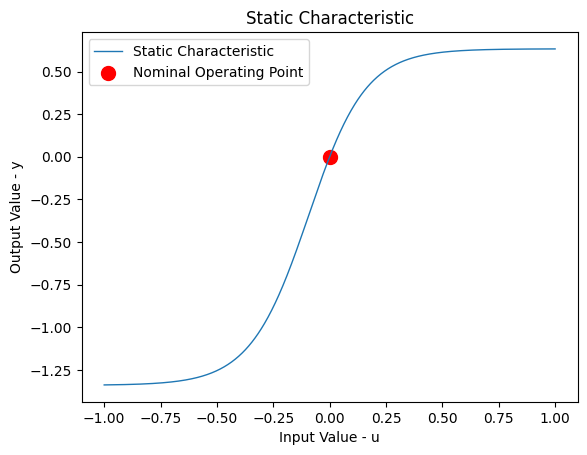

In [7]:
plt.plot(u_sym, y, linewidth=1, label="Static Characteristic")
plt.scatter(0, 0, color="r", s=100, label="Nominal Operating Point")
plt.legend()
plt.xlabel("Input Value - u")
plt.ylabel("Output Value - y")
plt.title("Static Characteristic")

In [8]:
pid2 = PID(0.5, 5, 0.4)

In [9]:
alpha1 = -1.489028
alpha2 = 0.535261
beta1 = 0.012757
beta2 = 0.010360

In [10]:
def get_y(x1, x2, alpha1, alpha2, beta1, beta2, u, k) -> tuple:
    g1 = (np.exp(7.5 * u[k - 5]) - 1) / (np.exp(7.5 * u[k - 5]) + 1)
    x1 = -alpha1 * x1 + x2 + beta1 * g1
    x2 = -alpha2 * x1 + beta2 * g1
    return 1.2 * (1 - np.exp(-1.5 * x1)).item(), x1, x2

In [13]:
y_list = []
k_min = 6
k_max = 1000
x1 = 0
x2 = 0
y_zad = 0.3
y = 0
k = np.arange(k_min, k_max)
u = np.zeros(k_max)
for s in k:
    u = pid2(u, y, y_zad)
    y, x1, x2 = get_y(x1, x2, alpha1, alpha2, beta1, beta2, u, s)
    y_list.append(y)

Text(0.5, 1.0, 'Static Characteristic')

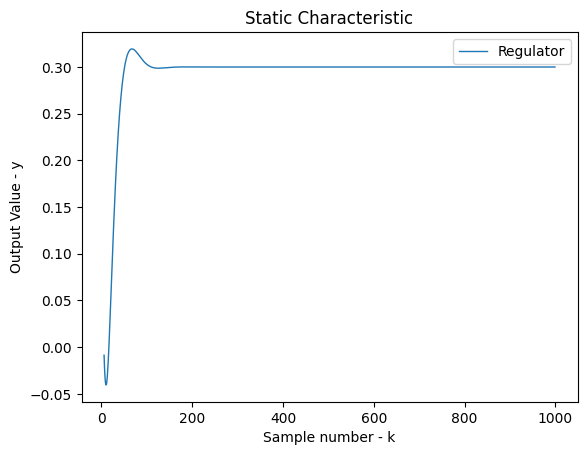

In [14]:
plt.plot(k, y_list, linewidth=1, label="Regulator")
plt.legend()
plt.xlabel("Sample number - k")
plt.ylabel("Output Value - y")
plt.title("Static Characteristic")